# Micro Credit Defaulter Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv("Data file.csv",index_col=[0])

In [3]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [5]:
df.shape

(209593, 36)

In [6]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

In [8]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Here we want to remember that amount is given in indonesian rupiah(currency) that's why the amount is given is high here , when we convert into indian ruppe we can easily understand the amounts and features.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

# Visualizations

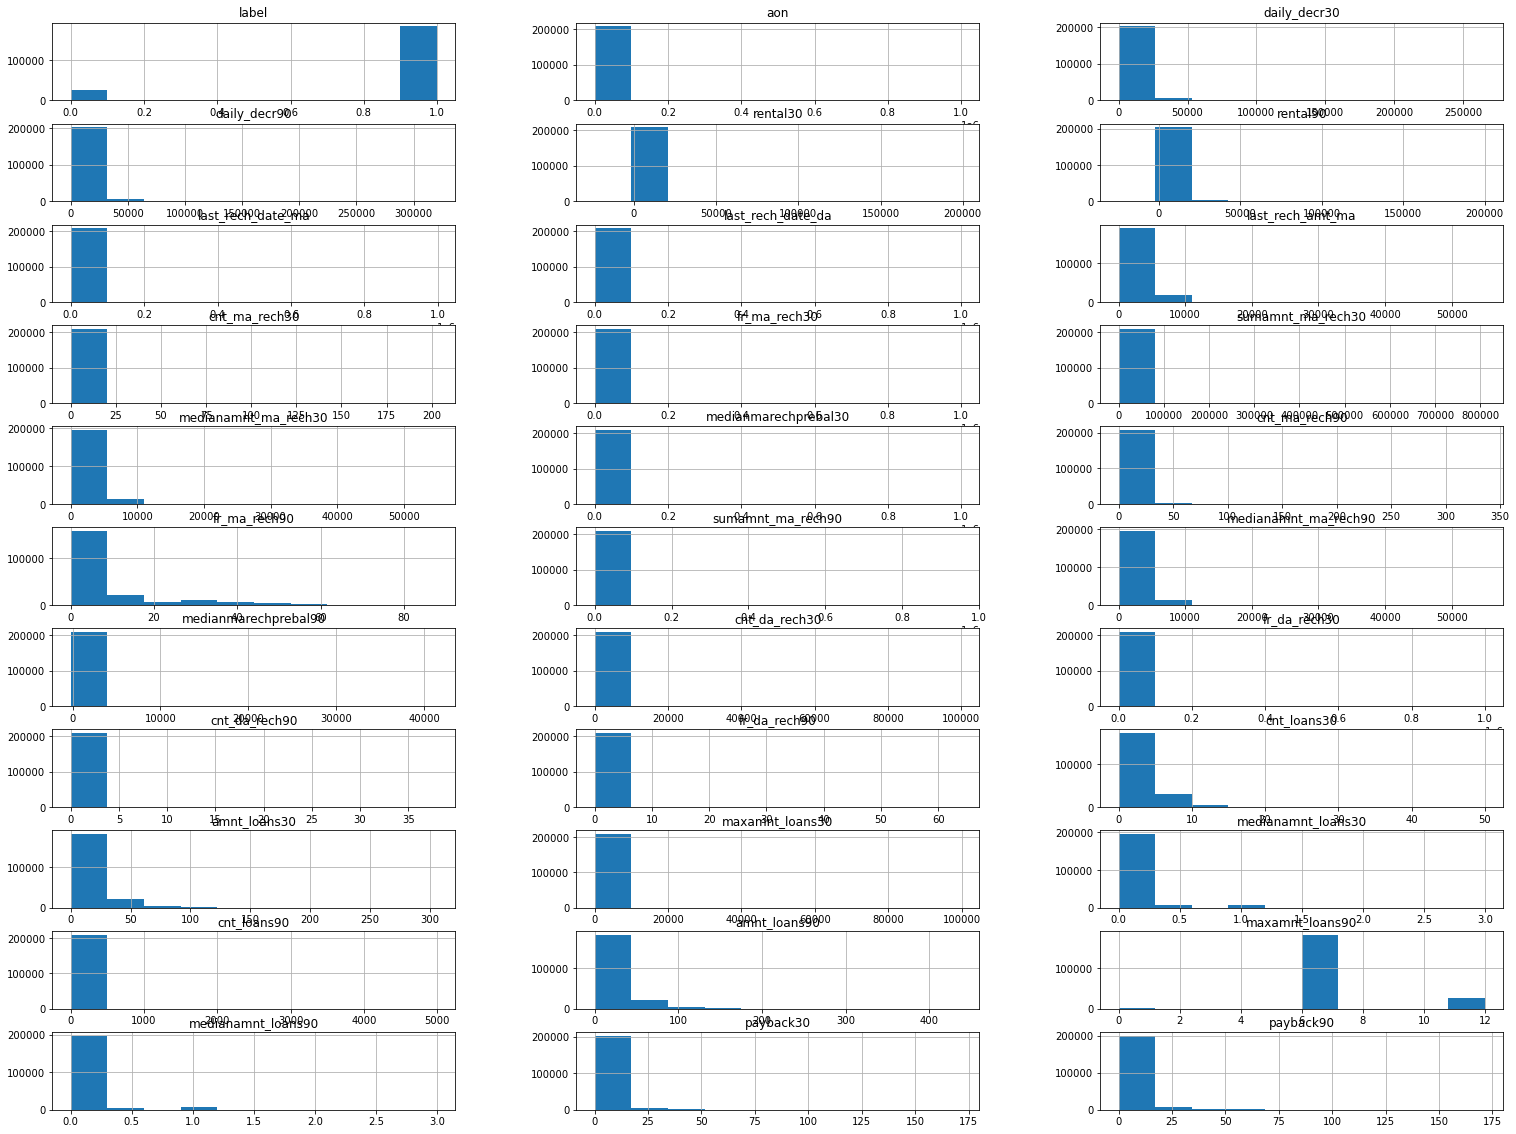

In [10]:
df.hist(figsize=(26,20),layout=(11,3),bins=10)
plt.show()

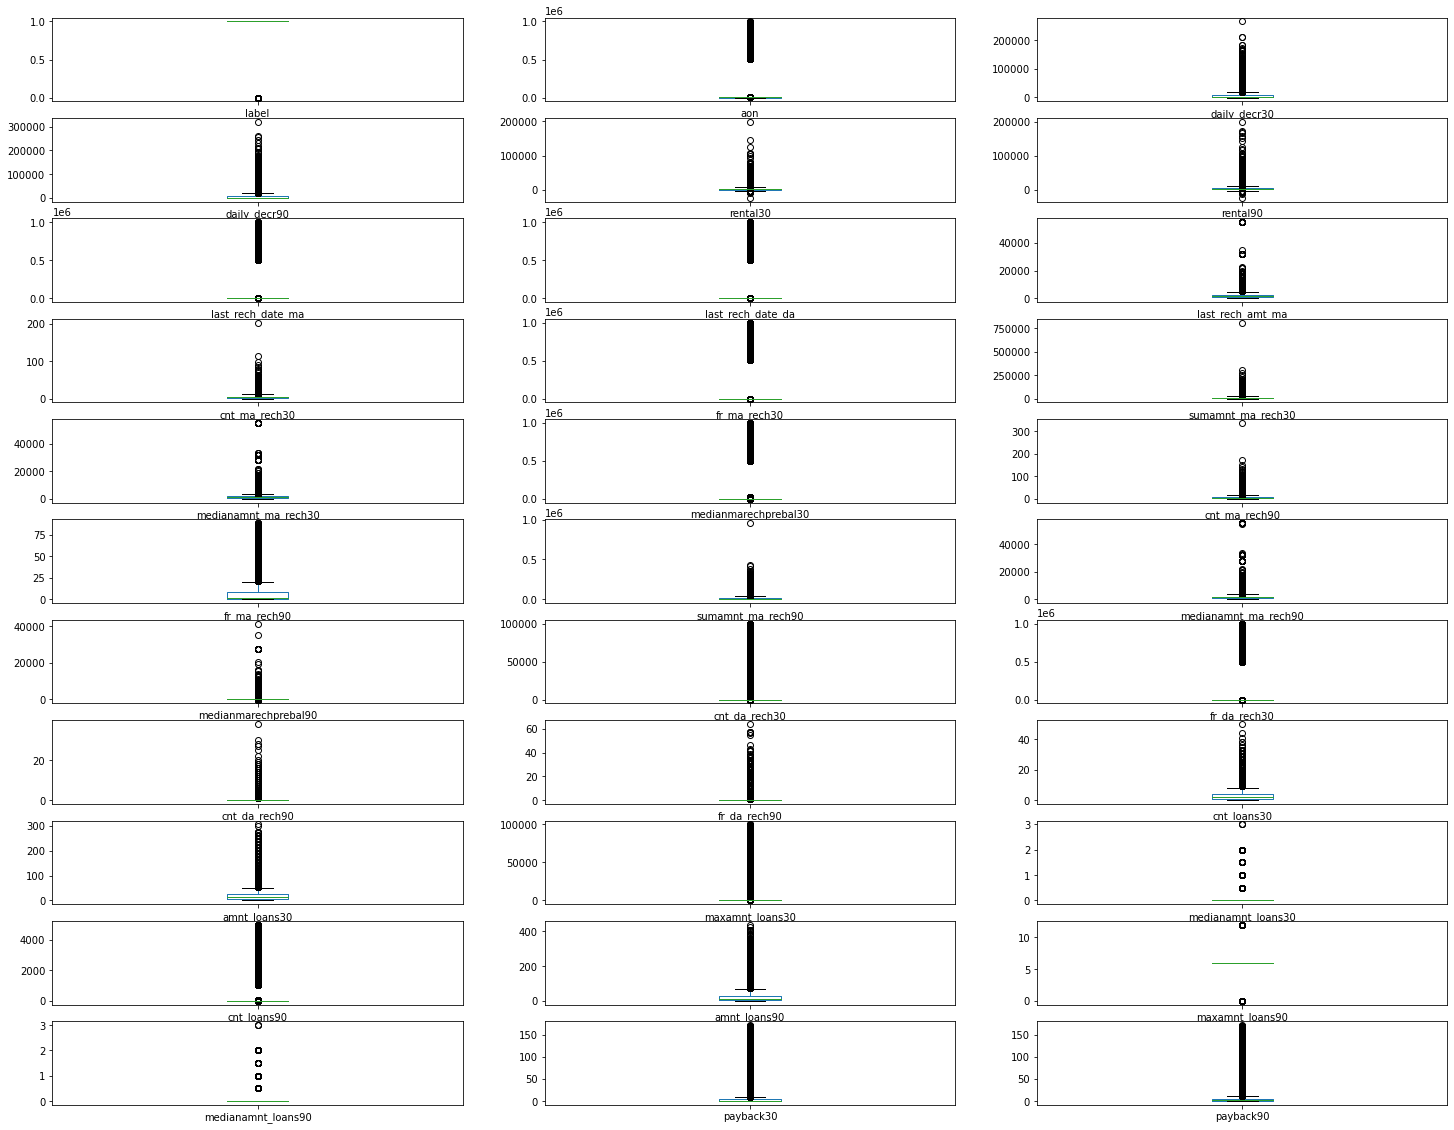

In [11]:
df.plot(kind='box',layout=(11,3),figsize=(25,20),subplots=True)
plt.show()

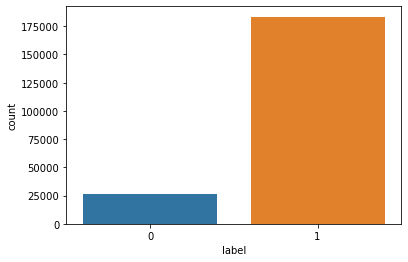

1    87.517713
0    12.482287
Name: label, dtype: float64

In [12]:
sns.countplot('label',data=df)
plt.show()
df['label'].value_counts()*100/len(df)

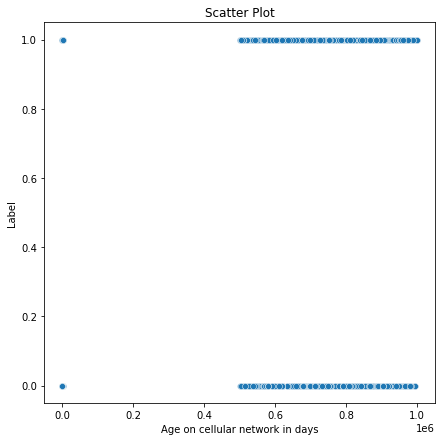

In [13]:
plt.figure(figsize=(7,7))
plt.xlabel("Age on cellular network in days")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="aon",y="label",data=df)
plt.show()

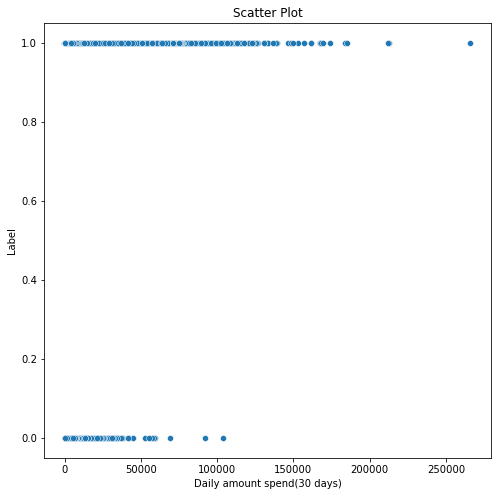

In [14]:
plt.figure(figsize=(8,8))
plt.xlabel("Daily amount spend(30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="daily_decr30",y="label",data=df)
plt.show()

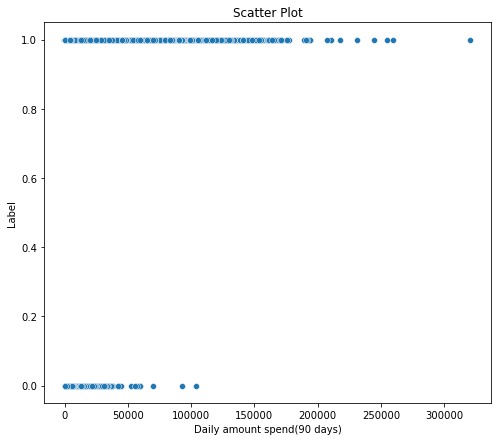

In [15]:
plt.figure(figsize=(8,7))
plt.xlabel("Daily amount spend(90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="daily_decr90",y="label",data=df)
plt.show()

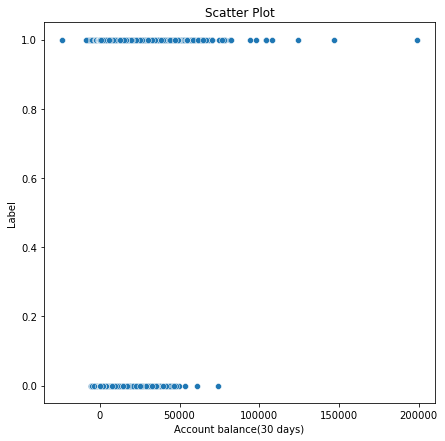

In [16]:
plt.figure(figsize=(7,7))
plt.xlabel("Account balance(30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="rental30",y="label",data=df)
plt.show()

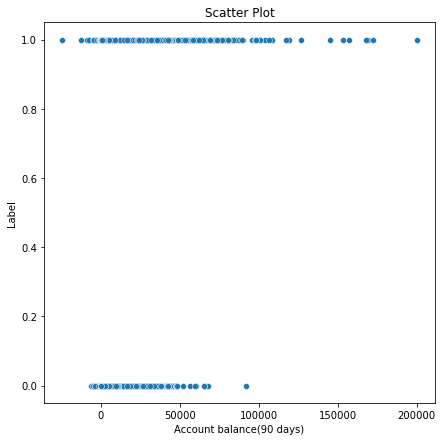

In [17]:
plt.figure(figsize=(7,7))
plt.xlabel("Account balance(90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="rental90",y="label",data=df)
plt.show()

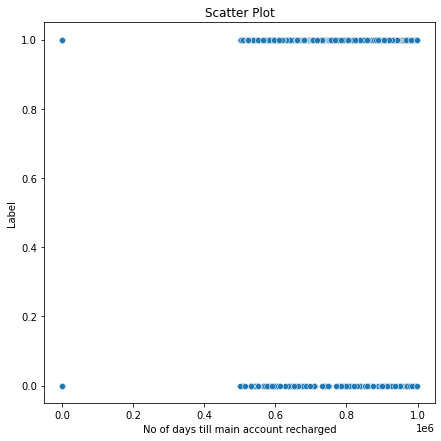

In [18]:
plt.figure(figsize=(7,7))
plt.xlabel("No of days till main account recharged")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="last_rech_date_ma",y="label",data=df)
plt.show()

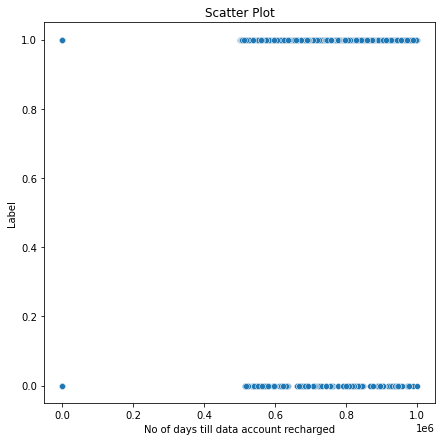

In [19]:
plt.figure(figsize=(7,7))
plt.xlabel("No of days till data account recharged")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="last_rech_date_da",y="label",data=df)
plt.show()

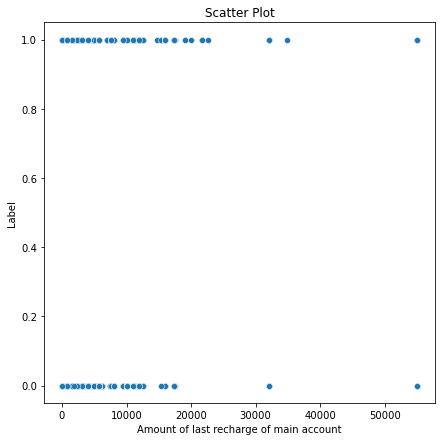

In [20]:
plt.figure(figsize=(7,7))
plt.xlabel("Amount of last recharge of main account")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="last_rech_amt_ma",y="label",data=df)
plt.show()

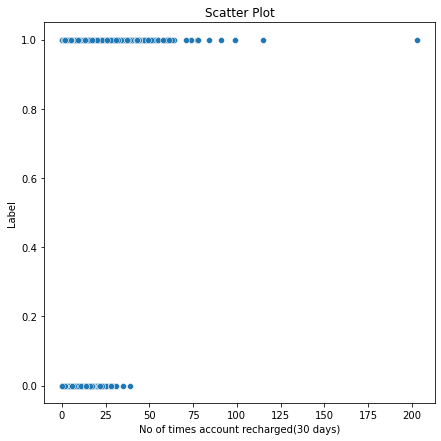

In [21]:
plt.figure(figsize=(7,7))
plt.xlabel("No of times account recharged(30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="cnt_ma_rech30",y="label",data=df)
plt.show()

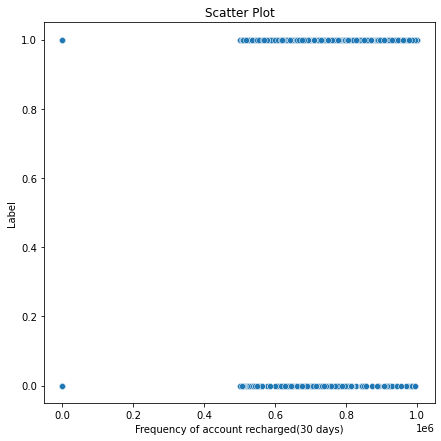

In [22]:
plt.figure(figsize=(7,7))
plt.xlabel("Frequency of account recharged(30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="fr_ma_rech30",y="label",data=df)
plt.show()

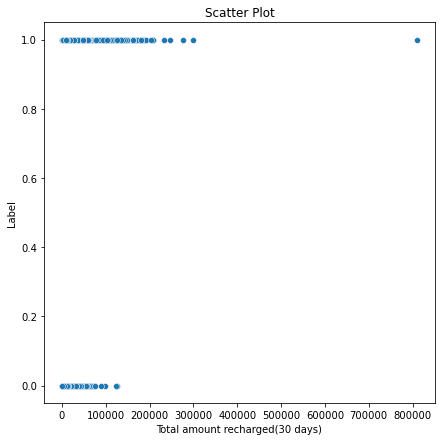

In [23]:
plt.figure(figsize=(7,7))
plt.xlabel("Total amount recharged(30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="sumamnt_ma_rech30",y="label",data=df)
plt.show()

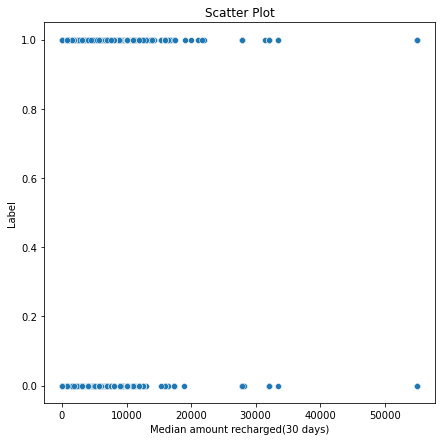

In [24]:
plt.figure(figsize=(7,7))
plt.xlabel("Median amount recharged(30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="medianamnt_ma_rech30",y="label",data=df)
plt.show()

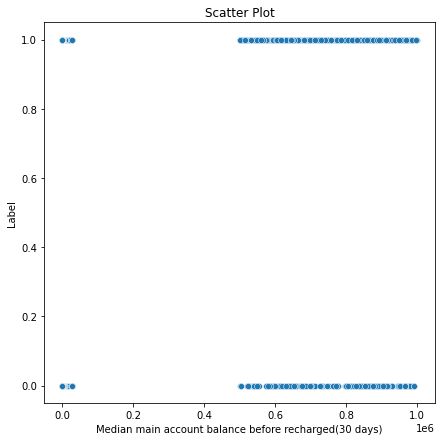

In [25]:
plt.figure(figsize=(7,7))
plt.xlabel("Median main account balance before recharged(30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="medianmarechprebal30",y="label",data=df)
plt.show()

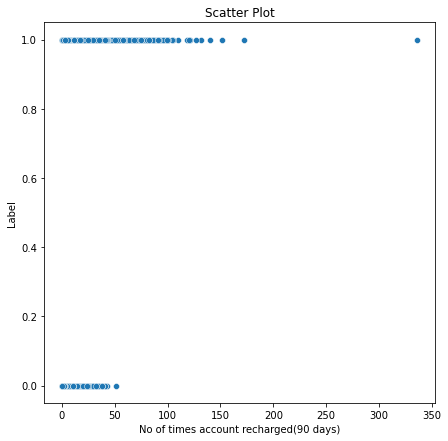

In [26]:
plt.figure(figsize=(7,7))
plt.xlabel("No of times account recharged(90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="cnt_ma_rech90",y="label",data=df)
plt.show()

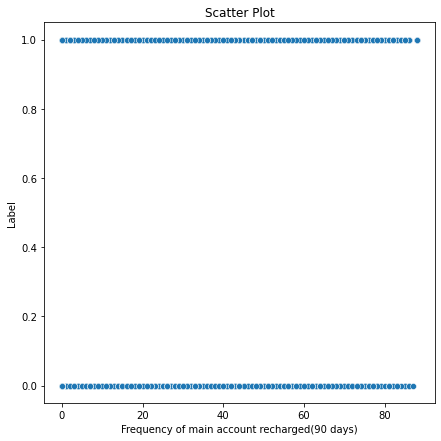

In [27]:
plt.figure(figsize=(7,7))
plt.xlabel("Frequency of main account recharged(90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="fr_ma_rech90",y="label",data=df)
plt.show()

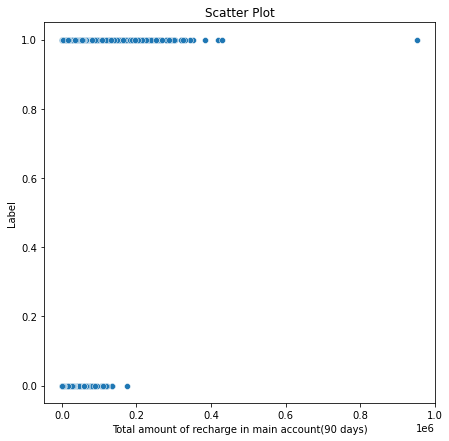

In [28]:
plt.figure(figsize=(7,7))
plt.xlabel("Total amount of recharge in main account(90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="sumamnt_ma_rech90",y="label",data=df)
plt.show()

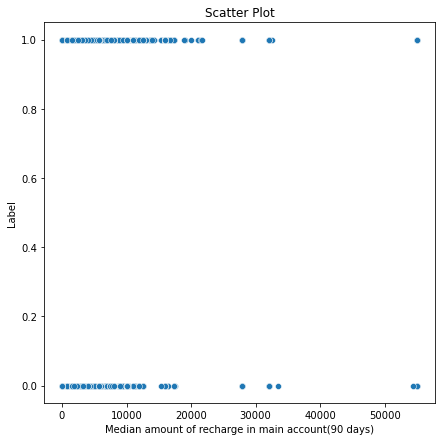

In [29]:
plt.figure(figsize=(7,7))
plt.xlabel("Median amount of recharge in main account(90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="medianamnt_ma_rech90",y="label",data=df)
plt.show()

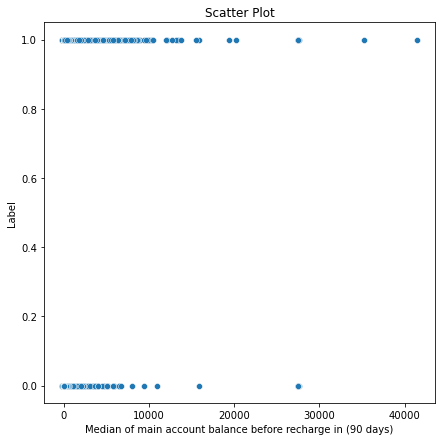

In [30]:
plt.figure(figsize=(7,7))
plt.xlabel("Median of main account balance before recharge in (90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="medianmarechprebal90",y="label",data=df)
plt.show()

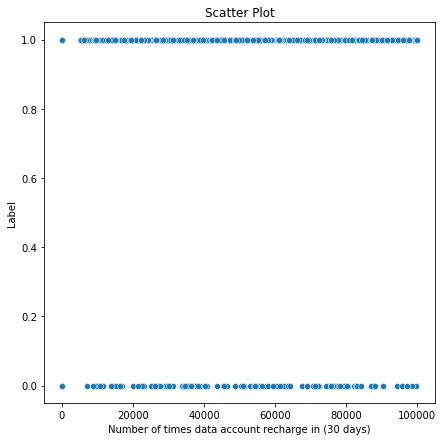

In [31]:
plt.figure(figsize=(7,7))
plt.xlabel("Number of times data account recharge in (30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="cnt_da_rech30",y="label",data=df)
plt.show()

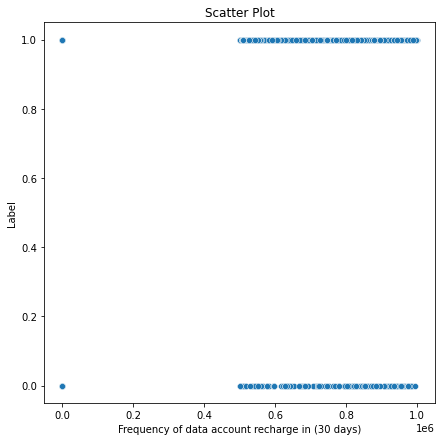

In [32]:
plt.figure(figsize=(7,7))
plt.xlabel("Frequency of data account recharge in (30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="fr_da_rech30",y="label",data=df)
plt.show()

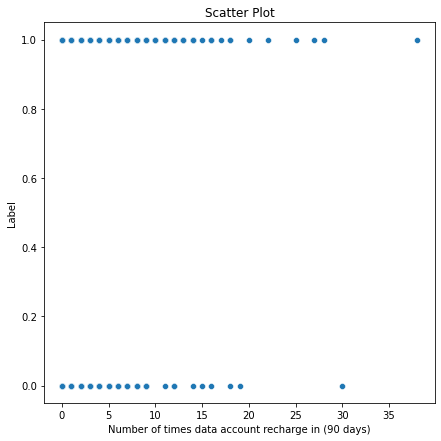

In [33]:
plt.figure(figsize=(7,7))
plt.xlabel("Number of times data account recharge in (90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="cnt_da_rech90",y="label",data=df)
plt.show()

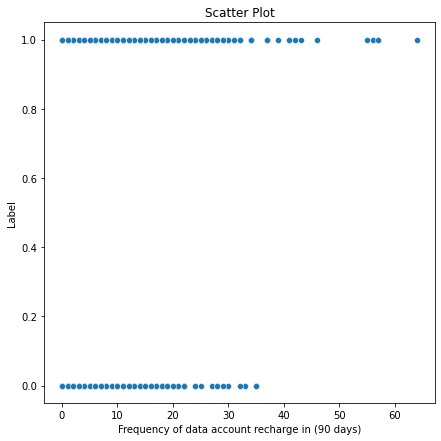

In [34]:
plt.figure(figsize=(7,7))
plt.xlabel("Frequency of data account recharge in (90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="fr_da_rech90",y="label",data=df)
plt.show()

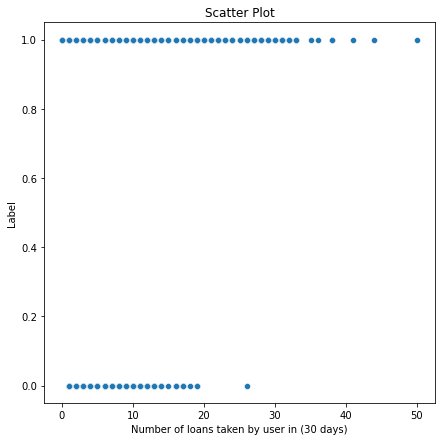

In [35]:
plt.figure(figsize=(7,7))
plt.xlabel("Number of loans taken by user in (30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="cnt_loans30",y="label",data=df)
plt.show()

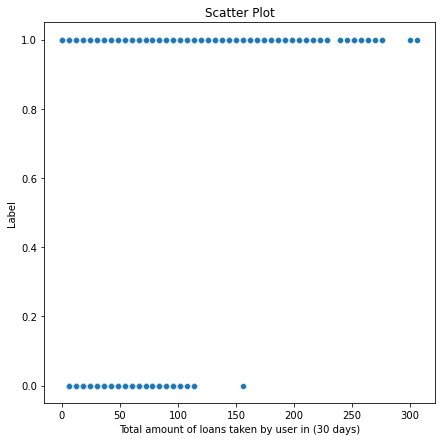

In [36]:
plt.figure(figsize=(7,7))
plt.xlabel("Total amount of loans taken by user in (30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="amnt_loans30",y="label",data=df)
plt.show()

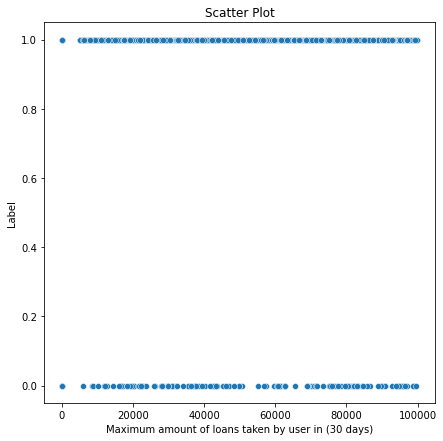

In [37]:
plt.figure(figsize=(7,7))
plt.xlabel("Maximum amount of loans taken by user in (30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="maxamnt_loans30",y="label",data=df)
plt.show()

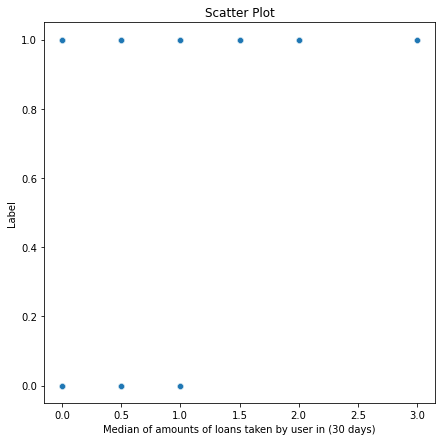

In [38]:
plt.figure(figsize=(7,7))
plt.xlabel("Median of amounts of loans taken by user in (30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="medianamnt_loans30",y="label",data=df)
plt.show()

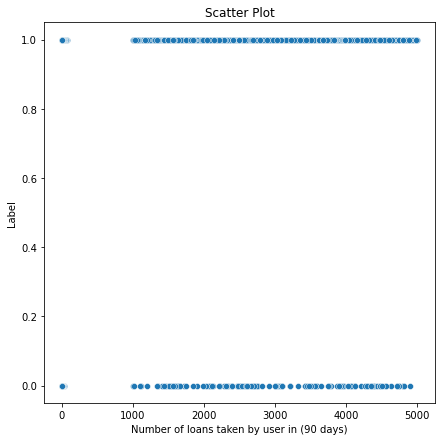

In [39]:
plt.figure(figsize=(7,7))
plt.xlabel("Number of loans taken by user in (90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="cnt_loans90",y="label",data=df)
plt.show()

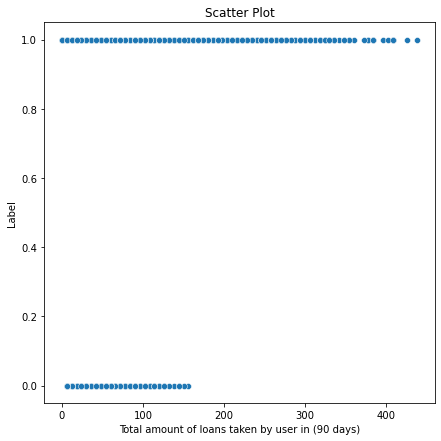

In [40]:
plt.figure(figsize=(7,7))
plt.xlabel("Total amount of loans taken by user in (90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="amnt_loans90",y="label",data=df)
plt.show()

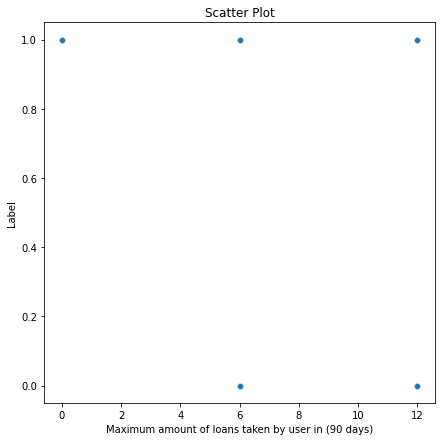

In [41]:
plt.figure(figsize=(7,7))
plt.xlabel("Maximum amount of loans taken by user in (90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="maxamnt_loans90",y="label",data=df)
plt.show()

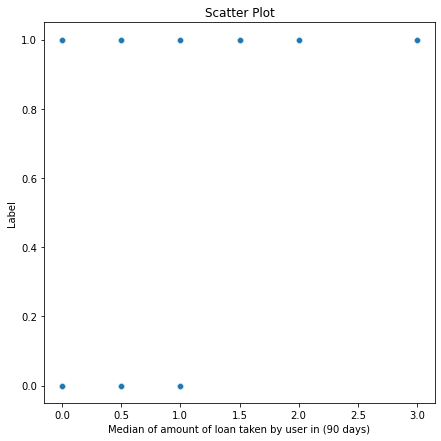

In [42]:
plt.figure(figsize=(7,7))
plt.xlabel("Median of amount of loan taken by user in (90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="medianamnt_loans90",y="label",data=df)
plt.show()

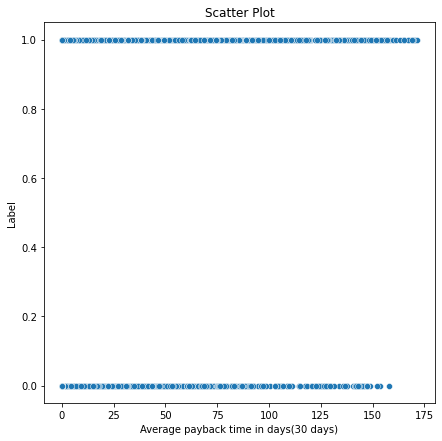

In [43]:
plt.figure(figsize=(7,7))
plt.xlabel("Average payback time in days(30 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="payback30",y="label",data=df)
plt.show()

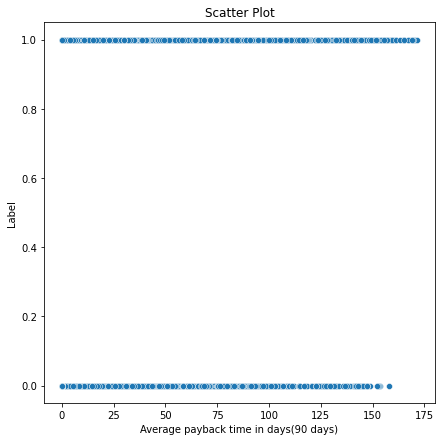

In [44]:
plt.figure(figsize=(7,7))
plt.xlabel("Average payback time in days(90 days)")
plt.ylabel("Label")
plt.title("Scatter Plot")
sns.scatterplot(x="payback90",y="label",data=df)
plt.show()

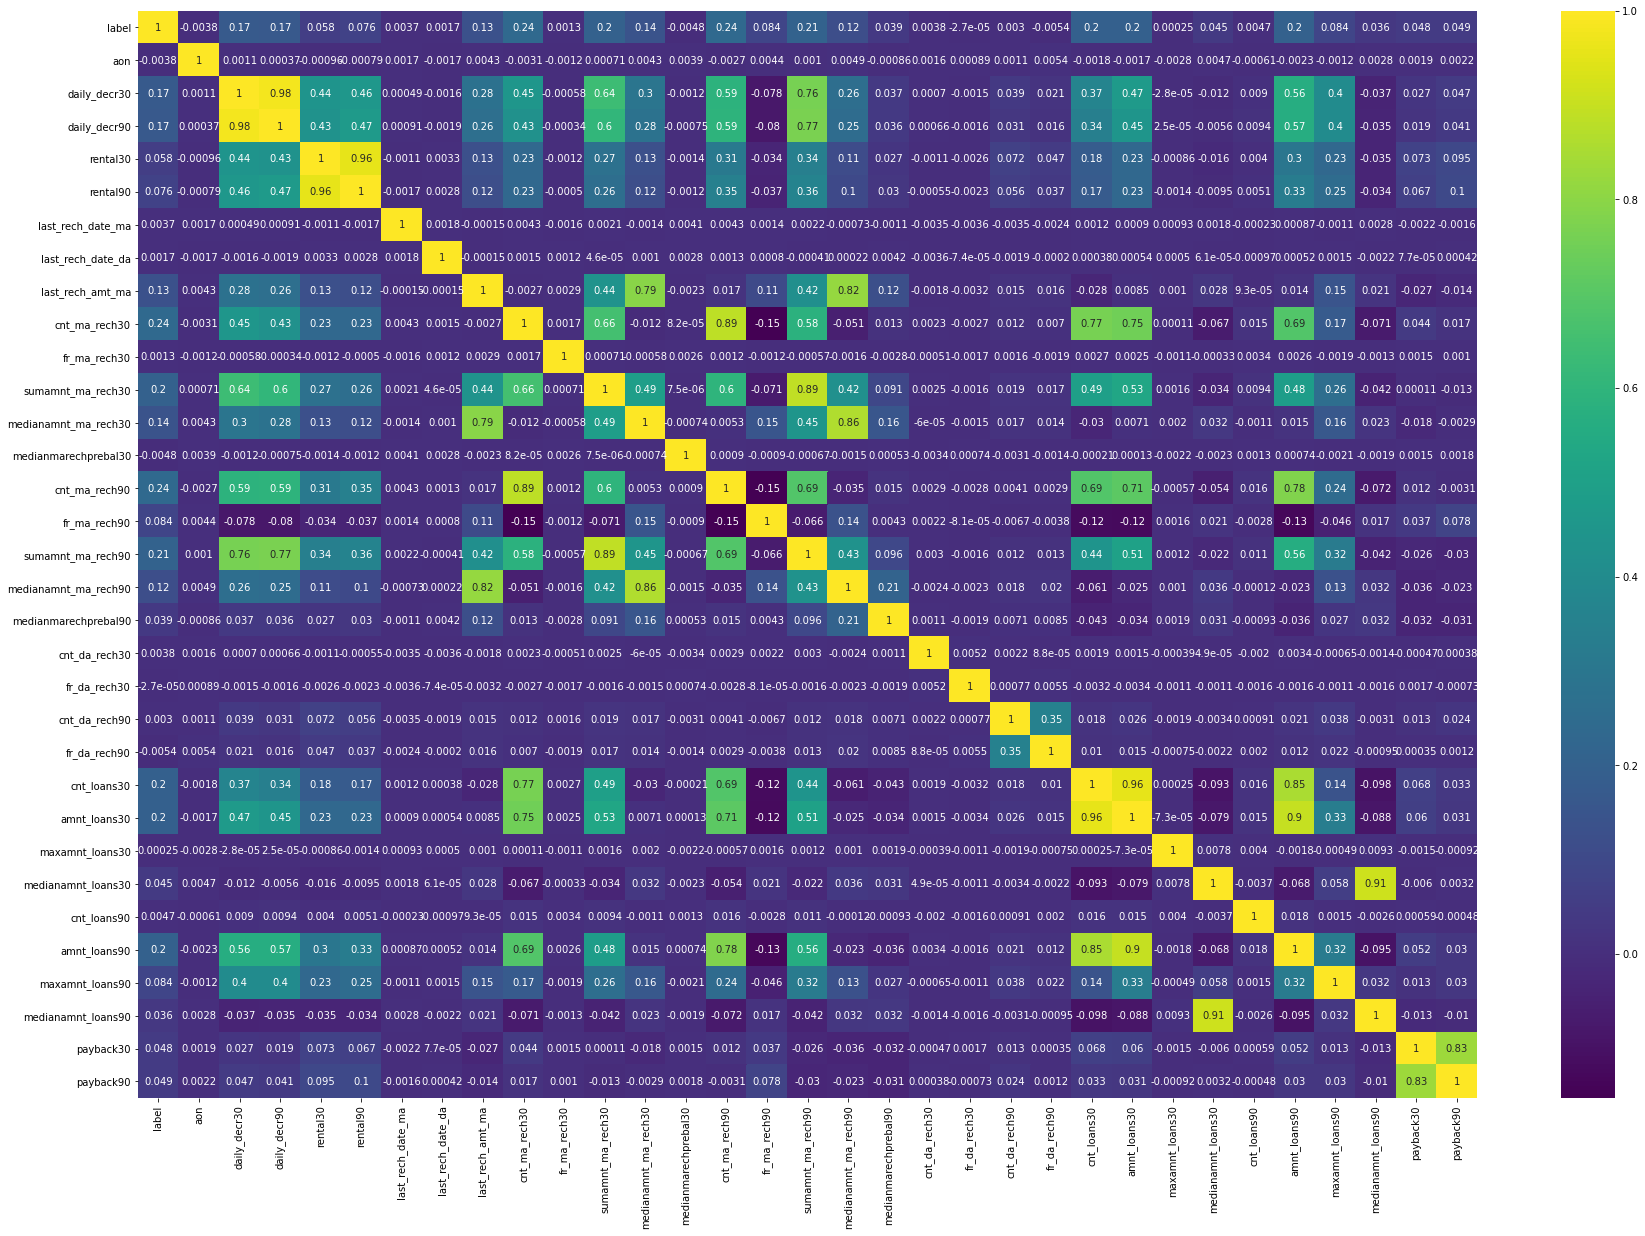

In [45]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

Here we can observe that recharges,loan amount,account balance etc.. in 30 days are highly correlated to the recharges etc.. done in 90 days.Simply we can say that multicollinearity is present.

# Data Cleaning

In [46]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [47]:
df.head(3)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20
2,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10
3,1,17943I70372,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-08-19


In [48]:
print(df[df['aon']==0]['aon'].value_counts(),"\n")

print(df[df['daily_decr30']==0]['daily_decr30'].value_counts(),"\n")

print(df[df['daily_decr90']==0]['daily_decr90'].value_counts(),"\n")

print(df[df['rental30']==0]['rental30'].value_counts(),"\n")

print(df[df['rental90']==0]['rental90'].value_counts(),"\n")

print(df[df['last_rech_date_ma']==0]['last_rech_date_ma'].value_counts(),"\n")

print(df[df['last_rech_date_da']==0]['last_rech_date_da'].value_counts(),"\n")

print(df[df['last_rech_amt_ma']==0]['last_rech_amt_ma'].value_counts(),"\n")

print(df[df['cnt_ma_rech30']==0]['cnt_ma_rech30'].value_counts(),"\n")

print(df[df['fr_ma_rech30']==0]['fr_ma_rech30'].value_counts(),"\n")

print(df[df['sumamnt_ma_rech30']==0]['sumamnt_ma_rech30'].value_counts(),"\n")

print(df[df['medianamnt_ma_rech30']==0]['medianamnt_ma_rech30'].value_counts(),"\n")

print(df[df['medianmarechprebal30']==0]['medianmarechprebal30'].value_counts(),"\n")

print(df[df['cnt_ma_rech90']==0]['cnt_ma_rech90'].value_counts(),"\n")

print(df[df['fr_ma_rech90']==0]['fr_ma_rech90'].value_counts(),"\n")

print(df[df['sumamnt_ma_rech90']==0]['sumamnt_ma_rech90'].value_counts(),"\n")

print(df[df['medianamnt_ma_rech90']==0]['medianamnt_ma_rech90'].value_counts(),"\n")

print(df[df['medianmarechprebal90']==0]['medianmarechprebal90'].value_counts(),"\n")

print(df[df['cnt_da_rech30']==0]['cnt_da_rech30'].value_counts(),"\n")

print(df[df['cnt_da_rech90']==0]['cnt_da_rech90'].value_counts(),"\n")

print(df[df['fr_da_rech30']==0]['fr_da_rech30'].value_counts(),"\n")

print(df[df['fr_da_rech90']==0]['fr_da_rech90'].value_counts(),"\n")

print(df[df['cnt_loans30']==0]['cnt_loans30'].value_counts(),"\n")

print(df[df['amnt_loans30']==0]['amnt_loans30'].value_counts(),"\n")

print(df[df['maxamnt_loans30']==0]['maxamnt_loans30'].value_counts(),"\n")

print(df[df['medianamnt_loans30']==0]['medianamnt_loans30'].value_counts(),"\n")

print(df[df['cnt_loans90']==0]['cnt_loans90'].value_counts(),"\n")

print(df[df['amnt_loans90']==0]['amnt_loans90'].value_counts(),"\n")

print(df[df['maxamnt_loans90']==0]['maxamnt_loans90'].value_counts(),"\n")

print(df[df['medianamnt_loans90']==0]['medianamnt_loans90'].value_counts(),"\n")

print(df[df['payback30']==0]['payback30'].value_counts(),"\n")

print(df[df['payback90']==0]['payback90'].value_counts(),"\n")

Series([], Name: aon, dtype: int64) 

0.0    4144
Name: daily_decr30, dtype: int64 

0.0    4063
Name: daily_decr90, dtype: int64 

0.0    7566
Name: rental30, dtype: int64 

0.0    6918
Name: rental90, dtype: int64 

0.0    20743
Name: last_rech_date_ma, dtype: int64 

0.0    202861
Name: last_rech_date_da, dtype: int64 

0    20995
Name: last_rech_amt_ma, dtype: int64 

0    27979
Name: cnt_ma_rech30, dtype: int64 

0.0    78683
Name: fr_ma_rech30, dtype: int64 

0.0    27979
Name: sumamnt_ma_rech30, dtype: int64 

0.0    27979
Name: medianamnt_ma_rech30, dtype: int64 

0.0    30680
Name: medianmarechprebal30, dtype: int64 

0    20950
Name: cnt_ma_rech90, dtype: int64 

0    65753
Name: fr_ma_rech90, dtype: int64 

0    20950
Name: sumamnt_ma_rech90, dtype: int64 

0.0    20950
Name: medianamnt_ma_rech90, dtype: int64 

0.0    23391
Name: medianmarechprebal90, dtype: int64 

0.0    205479
Name: cnt_da_rech30, dtype: int64 

0    204226
Name: cnt_da_rech90, dtype: int64 

0.0    2080

Here the counts of values of zeroes in column, we can replace zeroes of columns which is above 20000 with mean

In [49]:
df['last_rech_date_ma']=df['last_rech_date_ma'].replace(0,df['last_rech_date_ma'].mean())

df['last_rech_date_da']=df['last_rech_date_da'].replace(0,df['last_rech_date_da'].mean())

df['last_rech_amt_ma']=df['last_rech_amt_ma'].replace(0,df['last_rech_amt_ma'].mean())

df['cnt_ma_rech30']=df['cnt_ma_rech30'].replace(0,df['cnt_ma_rech30'].mean())

df['fr_ma_rech30']=df['fr_ma_rech30'].replace(0,df['fr_ma_rech30'].mean())

df['sumamnt_ma_rech30']=df['sumamnt_ma_rech30'].replace(0,df['sumamnt_ma_rech30'].mean())

df['medianamnt_ma_rech30']=df['medianamnt_ma_rech30'].replace(0,df['medianamnt_ma_rech30'].mean())

df['medianmarechprebal30']=df['medianmarechprebal30'].replace(0,df['medianmarechprebal30'].mean())

df['cnt_ma_rech90']=df['cnt_ma_rech90'].replace(0,df['cnt_ma_rech90'].mean())

df['fr_ma_rech90']=df['fr_ma_rech90'].replace(0,df['fr_ma_rech90'].mean())

df['sumamnt_ma_rech90']=df['sumamnt_ma_rech90'].replace(0,df['sumamnt_ma_rech90'].mean())

df['medianamnt_ma_rech90']=df['medianamnt_ma_rech90'].replace(0,df['medianamnt_ma_rech90'].mean())

df['medianmarechprebal90']=df['medianmarechprebal90'].replace(0,df['medianmarechprebal90'].mean())

df['cnt_da_rech30']=df['cnt_da_rech30'].replace(0,df['cnt_da_rech30'].mean())

df['cnt_da_rech90']=df['cnt_da_rech90'].replace(0,df['cnt_da_rech90'].mean())

df['fr_da_rech30']=df['fr_da_rech30'].replace(0,df['fr_da_rech30'].mean())

df['fr_da_rech90']=df['fr_da_rech90'].replace(0,df['fr_da_rech90'].mean())

df['medianamnt_loans30']=df['medianamnt_loans30'].replace(0,df['medianamnt_loans30'].mean())

df['payback30']=df['payback30'].replace(0,df['payback30'].mean())

df['payback90']=df['payback90'].replace(0,df['payback90'].mean())

In [50]:
df['daily_decr30']=df.daily_decr30.mask(df.daily_decr30 == 0,df['daily_decr30'].mean())

df['daily_decr90']=df.daily_decr90.mask(df.daily_decr90 == 0,df['daily_decr90'].mean())

df['rental30']=df.rental30.mask(df.rental30 == 0,df['rental30'].mean())

df['rental90']=df.rental90.mask(df.rental90 == 0,df['rental90'].mean())

df['cnt_loans30']=df.cnt_loans30.mask(df.cnt_loans30 == 0,df['cnt_loans30'].mean())

df['amnt_loans30']=df.amnt_loans30.mask(df.amnt_loans30 == 0,df['amnt_loans30'].mean())

df['maxamnt_loans30']=df.maxamnt_loans30.mask(df.maxamnt_loans30 == 0,df['maxamnt_loans30'].mean())

df['cnt_loans90']=df.cnt_loans90.mask(df.cnt_loans90 == 0,df['cnt_loans90'].mean())

df['amnt_loans90']=df.amnt_loans90.mask(df.amnt_loans90 == 0,df['amnt_loans90'].mean())

df['maxamnt_loans90']=df.maxamnt_loans90.mask(df.maxamnt_loans90 == 0,df['maxamnt_loans90'].mean())

In [51]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

Let's drop this column have only one value and it is not impact our prediction

In [52]:
df.drop('pcircle',axis=1,inplace=True)

In [53]:
df['pdate']

1         2016-07-20
2         2016-08-10
3         2016-08-19
4         2016-06-06
5         2016-06-22
             ...    
209589    2016-06-17
209590    2016-06-12
209591    2016-07-29
209592    2016-07-25
209593    2016-07-07
Name: pdate, Length: 209593, dtype: object

Date column is in object type let's convert it into datetime using pandas datetime fuction

In [54]:
df['day']=pd.to_datetime(df.pdate,format="%Y/%m/%d").dt.day

df['month']=pd.to_datetime(df.pdate,format="%Y/%m/%d").dt.month

df['year']=pd.to_datetime(df.pdate,format="%Y/%m/%d").dt.year

In [55]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate', 'day', 'month', 'year'],
      dtype='object')

Columns created

In [56]:
df['year'].value_counts()

2016    209593
Name: year, dtype: int64

In [57]:
#dropping pdate and year column
df.drop(['pdate','year'],axis=1,inplace=True)

In [58]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'day', 'month'],
      dtype='object')

# Encoding

In [59]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma        float64
cnt_ma_rech30           float64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90           float64
fr_ma_rech90            float64
sumamnt_ma_rech90       float64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90           float64
fr_da_rech90            float64
cnt_loans30             float64
amnt_loans30            float64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90            float64
maxamnt_loans90         float64
medianam

In [60]:
df['msisdn'].value_counts()

47819I90840    7
04581I85330    7
94119I84456    6
87592I84456    6
30080I90588    6
              ..
41075I70784    1
73126I70781    1
18704I90847    1
75767I70785    1
86731I70789    1
Name: msisdn, Length: 186243, dtype: int64

In [61]:
df['msisdn']=LabelEncoder().fit_transform(df['msisdn'])

In [62]:
df['msisdn'].unique()

array([ 40191, 142291,  33594, ...,  42866, 111388, 121263])

# Outliers Removal

In [63]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [64]:
print(df.shape,"\n")
print(df_new.shape,"\n")

(209593, 36) 

(158913, 36) 



In [65]:
print("Percentage of data loss after removing outliers:",(209593-158913)/209593*100)

Percentage of data loss after removing outliers: 24.180196857719487


24% of data losses after removing outliers so I am not removing outliers

# Sepearting features and target

In [66]:
x=df.drop('label', axis = 1)
y =df['label']

In [67]:
x.head(3)

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
1,40191,272.0,3055.05,3065.15,220.13,260.13,2.0,3712.202921,1539.0,2.0,...,6.0,0.054029,2.0,12.0,6.0,0.0,29.000000,29.000000,20,7
2,142291,712.0,12122.00,12124.75,3691.26,3691.26,20.0,3712.202921,5787.0,1.0,...,12.0,0.054029,1.0,12.0,12.0,0.0,3.398826,4.321485,10,8
3,33594,535.0,1398.00,1398.00,900.13,900.13,3.0,3712.202921,1539.0,1.0,...,6.0,0.054029,1.0,6.0,6.0,0.0,3.398826,4.321485,19,8


In [68]:
pd.DataFrame(y.head())

,label
1,0
2,1
3,1
4,1
5,1


# Balancing Class

# Over Sampling

In [69]:
y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [71]:
y.value_counts()

0    183431
1    183431
Name: label, dtype: int64

# Multicollinearity

In [72]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
#checking values
vif

,vif,features
0,3.922773,msisdn
1,1.011983,aon
2,40.174519,daily_decr30
3,43.118771,daily_decr90
4,23.104782,rental30
5,23.820377,rental90
6,1.007407,last_rech_date_ma
7,1.019264,last_rech_date_da
8,7.688742,last_rech_amt_ma
9,32.431241,cnt_ma_rech30


In [73]:
def vif_calc(x):
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [74]:
vif_calc(x)

    VIF Factor              features
0     3.922773                msisdn
1     1.011983                   aon
2    40.174519          daily_decr30
3    43.118771          daily_decr90
4    23.104782              rental30
5    23.820377              rental90
6     1.007407     last_rech_date_ma
7     1.019264     last_rech_date_da
8     7.688742      last_rech_amt_ma
9    32.431241         cnt_ma_rech30
10    1.011445          fr_ma_rech30
11   23.879006     sumamnt_ma_rech30
12   13.503379  medianamnt_ma_rech30
13    1.008820  medianmarechprebal30
14   29.984567         cnt_ma_rech90
15    2.148547          fr_ma_rech90
16   25.376469     sumamnt_ma_rech90
17   13.798935  medianamnt_ma_rech90
18    1.181868  medianmarechprebal90
19    1.016280         cnt_da_rech30
20    1.019601          fr_da_rech30
21    1.209757         cnt_da_rech90
22    1.160839          fr_da_rech90
23   57.624445           cnt_loans30
24   70.998233          amnt_loans30
25    1.004320       maxamnt_loans30
2

column 'amnt_loan30' have high multicollinearity, we can drop it

In [75]:
x.drop('amnt_loans30',axis=1,inplace=True)

In [76]:
vif_calc(x)

    VIF Factor              features
0     3.922186                msisdn
1     1.011961                   aon
2    39.937039          daily_decr30
3    43.087723          daily_decr90
4    23.101989              rental30
5    23.813662              rental90
6     1.007406     last_rech_date_ma
7     1.019248     last_rech_date_da
8     7.687863      last_rech_amt_ma
9    32.117555         cnt_ma_rech30
10    1.011445          fr_ma_rech30
11   23.878593     sumamnt_ma_rech30
12   13.495474  medianamnt_ma_rech30
13    1.008819  medianmarechprebal30
14   29.275766         cnt_ma_rech90
15    2.147629          fr_ma_rech90
16   25.349966     sumamnt_ma_rech90
17   13.797430  medianamnt_ma_rech90
18    1.181859  medianmarechprebal90
19    1.016269         cnt_da_rech30
20    1.019543          fr_da_rech30
21    1.209740         cnt_da_rech90
22    1.160786          fr_da_rech90
23   15.992798           cnt_loans30
24    1.004318       maxamnt_loans30
25    9.092483    medianamnt_loans30
2

Now multicollinrearity is fine if we drop all features, we don't have any features for prediction

# Skewness

In [77]:
x.skew()

msisdn                  -0.000166
aon                     10.056791
daily_decr30             4.839387
daily_decr90             5.271044
rental30                 4.560604
rental90                 4.626016
last_rech_date_ma       15.280937
last_rech_date_da       14.912860
last_rech_amt_ma         5.451749
cnt_ma_rech30            4.280687
fr_ma_rech30            14.855021
sumamnt_ma_rech30        7.806146
medianamnt_ma_rech30     5.291948
medianmarechprebal30    14.067108
cnt_ma_rech90            4.242017
fr_ma_rech90             2.700269
sumamnt_ma_rech90        5.927703
medianamnt_ma_rech90     5.318102
medianmarechprebal90    49.180855
cnt_da_rech30           18.508343
fr_da_rech30            14.754693
cnt_da_rech90           29.362973
fr_da_rech90            28.934115
cnt_loans30              3.400655
maxamnt_loans30         17.920974
medianamnt_loans30       5.200890
cnt_loans90             18.260313
amnt_loans90             3.933888
maxamnt_loans90          2.886962
medianamnt_loa

# Removal of skewness

In [78]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

Skewness removed

# Scaling

In [79]:
sc=StandardScaler()
x=sc.fit_transform(x)

features scaled

# Model Building

In [80]:
#logistic regression
lr=LogisticRegression()
l=[]
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training accuarcy is:- 0.7715067636818271
At random state 0,the testing accuracy is:- 0.7730603166295957


At random state 0 model performs well
At random state 1,the training accuarcy is:- 0.771855669353725
At random state 1,the testing accuracy is:- 0.7724388329190108


At random state 1 model performs well
At random state 2,the training accuarcy is:- 0.7714704193410045
At random state 2,the testing accuracy is:- 0.7735073487722971


At random state 2 model performs well
At random state 3,the training accuarcy is:- 0.7719756056784398
At random state 3,the testing accuracy is:- 0.7714793492956518


At random state 3 model performs well
At random state 4,the training accuarcy is:- 0.771910185864959
At random state 4,the testing accuracy is:- 0.7724170264730255


At random state 4 model performs well
At random state 5,the training accuarcy is:- 0.7721682306848001
At random state 5,the testing accuracy is:- 0.771588381525579


At random state 5 model performs well
A

At random state 49,the training accuarcy is:- 0.7728987519353362
At random state 49,the testing accuracy is:- 0.7693314143660867


At random state 49 model performs well
At random state 50,the training accuarcy is:- 0.772004681151098
At random state 50,the testing accuracy is:- 0.7726132844868944


At random state 50 model performs well
At random state 51,the training accuarcy is:- 0.7716921198200228
At random state 51,the testing accuracy is:- 0.7722316716821492


At random state 51 model performs well
At random state 52,the training accuarcy is:- 0.7711215136691065
At random state 52,the testing accuracy is:- 0.7735291552182825


At random state 52 model performs well
At random state 53,the training accuarcy is:- 0.772262725970939
At random state 53,the testing accuracy is:- 0.7716538008635353


At random state 53 model performs well
At random state 54,the training accuarcy is:- 0.7718629382218894
At random state 54,the testing accuracy is:- 0.7725587683719307


At random state 54 mo

At random state 98,the training accuarcy is:- 0.7720119500192625
At random state 98,the testing accuracy is:- 0.7713267041737537


At random state 98 model performs well
At random state 99,the training accuarcy is:- 0.771855669353725
At random state 99,the testing accuracy is:- 0.7727332199398143


At random state 99 model performs well


In [81]:
#list of best random sates
l

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [82]:
#logistic regression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=99)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
acc_l=classification_report(y_test,predlr)
print(acc_l)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     45979
           1       0.79      0.74      0.76     45737

    accuracy                           0.77     91716
   macro avg       0.77      0.77      0.77     91716
weighted avg       0.77      0.77      0.77     91716



In [83]:
#auc roc curve
#predicting probabilities
y_pred_proba=lr.predict_proba(x_test)[:,1] #threshold value
y_pred_proba

array([0.95864579, 0.18596645, 0.29824531, ..., 0.02263673, 0.21683952,
       0.77377571])

In [84]:
#calculating roc curves
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

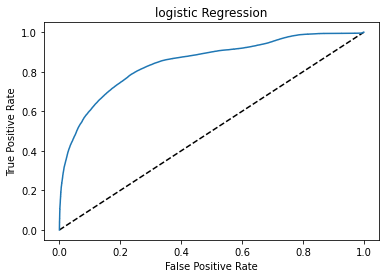

In [85]:
#plotting roc curves
plt.plot([0,1],[0,1],'k--')  #([x-axis],[y-axis],broken lines)
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('logistic Regression')
plt.show()

In [86]:
#decision tree classifier
dt=DecisionTreeClassifier()
d=[]
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training accuarcy is:- 0.9999963655659178
At random state 0,the testing accuracy is:- 0.9094814427144664


At random state 1,the training accuarcy is:- 0.9999854622636709
At random state 1,the testing accuracy is:- 0.9088381525578961


At random state 2,the training accuarcy is:- 0.9999890966977532
At random state 2,the testing accuracy is:- 0.9115857647520607


At random state 3,the training accuarcy is:- 0.9999890966977532
At random state 3,the testing accuracy is:- 0.9100811199790658


At random state 4,the training accuarcy is:- 0.9999963655659178
At random state 4,the testing accuracy is:- 0.9097322168432989


At random state 5,the training accuarcy is:- 0.9999818278295887
At random state 5,the testing accuracy is:- 0.9092088621396485


At random state 6,the training accuarcy is:- 0.9999927311318355
At random state 6,the testing accuracy is:- 0.9082384752932967


At random state 7,the training accuarcy is:- 0.9999927311318355
At random state 7,the testing acc

At random state 63,the training accuarcy is:- 0.9999927311318355
At random state 63,the testing accuracy is:- 0.9085110558681146


At random state 64,the training accuarcy is:- 0.9999854622636709
At random state 64,the testing accuracy is:- 0.9083366043002311


At random state 65,the training accuarcy is:- 0.9999890966977532
At random state 65,the testing accuracy is:- 0.9079986043874569


At random state 66,the training accuarcy is:- 0.9999927311318355
At random state 66,the testing accuracy is:- 0.9102228618779711


At random state 67,the training accuarcy is:- 0.9999818278295887
At random state 67,the testing accuracy is:- 0.9085982816520564


At random state 68,the training accuarcy is:- 0.9999963655659178
At random state 68,the testing accuracy is:- 0.91041911989184


At random state 69,the training accuarcy is:- 0.9999854622636709
At random state 69,the testing accuracy is:- 0.9100157006411095


At random state 70,the training accuarcy is:- 0.9999818278295887
At random state 70,t

In [87]:
#decision tree classifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=99)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
acc_d=classification_report(y_test,preddt)
print(acc_d)
print(confusion_matrix(y_test,preddt))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     45979
           1       0.91      0.90      0.91     45737

    accuracy                           0.91     91716
   macro avg       0.91      0.91      0.91     91716
weighted avg       0.91      0.91      0.91     91716

[[42064  3915]
 [ 4411 41326]]


In [88]:
#auc roc curve
#predicting probabilities
y_pred_proba=dt.predict_proba(x_test)[:,1] #threshold value
y_pred_proba

#calculating roc curves
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

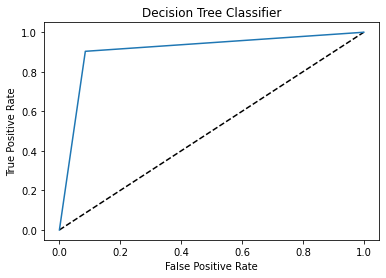

In [89]:
#plotting roc curves
plt.plot([0,1],[0,1],'k--')  #([x-axis],[y-axis],broken lines)
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier')
plt.show()

In [90]:
#naive bayes bernoulli 
bnb=BernoulliNB()
b=[]
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    bnb.fit(x_train,y_train)
    pred_train=bnb.predict(x_train)
    pred_test=bnb.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        b.append(i)

At random state 0,the training accuarcy is:- 0.73361415394009
At random state 0,the testing accuracy is:- 0.7310611016616512


At random state 0 model performs well
At random state 1,the training accuarcy is:- 0.7327455241944277
At random state 1,the testing accuracy is:- 0.7341685202145755


At random state 1 model performs well
At random state 2,the training accuarcy is:- 0.7326328567378774
At random state 2,the testing accuracy is:- 0.7350625844999782


At random state 3,the training accuarcy is:- 0.7333233992135084
At random state 3,the testing accuracy is:- 0.7325439399886606


At random state 3 model performs well
At random state 4,the training accuarcy is:- 0.7329272458985412
At random state 4,the testing accuracy is:- 0.7337105848488813


At random state 4 model performs well
At random state 5,the training accuarcy is:- 0.7329054392940475
At random state 5,the testing accuracy is:- 0.7336124558419469


At random state 5 model performs well
At random state 6,the training accuarc

At random state 49,the training accuarcy is:- 0.7336941114898999
At random state 49,the testing accuracy is:- 0.7314645209123817


At random state 49 model performs well
At random state 50,the training accuarcy is:- 0.73274915862851
At random state 50,the testing accuracy is:- 0.734724584587204


At random state 50 model performs well
At random state 51,the training accuarcy is:- 0.7330362789210092
At random state 51,the testing accuracy is:- 0.7334380042740634


At random state 51 model performs well
At random state 52,the training accuarcy is:- 0.7328945359918008
At random state 52,the testing accuracy is:- 0.733492520389027


At random state 52 model performs well
At random state 53,the training accuarcy is:- 0.7331525808116418
At random state 53,the testing accuracy is:- 0.732685681887566


At random state 53 model performs well
At random state 54,the training accuarcy is:- 0.7330980643004078
At random state 54,the testing accuracy is:- 0.7327401980025295


At random state 54 model

At random state 98,the training accuarcy is:- 0.7333960878951539
At random state 98,the testing accuracy is:- 0.7321732304069083


At random state 98 model performs well
At random state 99,the training accuarcy is:- 0.7329345147667057
At random state 99,the testing accuracy is:- 0.7339940686466919


At random state 99 model performs well


In [91]:
#list of best random states
b

[0,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [92]:
#bernoulli naive bayes
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=99)
bnb.fit(x_train,y_train)
predbnb=bnb.predict(x_test)
acc_b=classification_report(y_test,predbnb)
print(acc_b)
print(confusion_matrix(y_test,predbnb))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74     45979
           1       0.73      0.73      0.73     45737

    accuracy                           0.73     91716
   macro avg       0.73      0.73      0.73     91716
weighted avg       0.73      0.73      0.73     91716

[[33843 12136]
 [12261 33476]]


In [93]:
#auc roc curve
#predicting probabilities
y_pred_proba=bnb.predict_proba(x_test)[:,1] #threshold value
y_pred_proba

#calculating roc curves
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

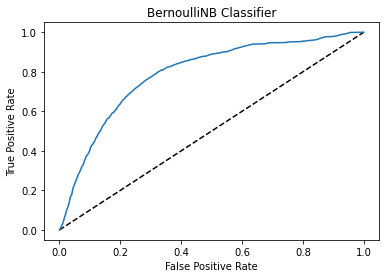

In [94]:
#plotting roc curves
plt.plot([0,1],[0,1],'k--')  #([x-axis],[y-axis],broken lines)
plt.plot(fpr,tpr,label='BernoulliNB Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BernoulliNB Classifier')
plt.show()

In [95]:
#random forest classifier
rf=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=99)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
acc_r=classification_report(y_test,predrf)
print(acc_r)
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     45979
           1       0.94      0.96      0.95     45737

    accuracy                           0.95     91716
   macro avg       0.95      0.95      0.95     91716
weighted avg       0.95      0.95      0.95     91716

[[43082  2897]
 [ 1977 43760]]


# Cross Validation Score

In [96]:
print("CV score and it's mean of logistic Regression:",cross_val_score(lr,x,y,cv=8).mean(),"accuracy score:",accuracy_score(y_test,predlr))
print("CV score and it's mean of Decision Tree Classifier:",cross_val_score(dt,x,y,cv=8).mean(),"accuracy score:",accuracy_score(y_test,preddt))
print("CV score and it's mean of BernoulliNB:",cross_val_score(bnb,x,y,cv=8).mean(),"accuracy score:",accuracy_score(y_test,predbnb))
print("CV score and it's mean of Random Forest Classifier:",cross_val_score(rf,x,y,cv=8).mean(),"accuracy score:",accuracy_score(y_test,predrf))

CV score and it's mean of logistic Regression: 0.7715326558369152 accuracy score: 0.7727332199398143
CV score and it's mean of Decision Tree Classifier: 0.9056622074850394 accuracy score: 0.9092197653626412
CV score and it's mean of BernoulliNB: 0.7331122032291757 accuracy score: 0.7339940686466919
CV score and it's mean of Random Forest Classifier: 0.9431286299830421 accuracy score: 0.946857691133499


CV score and accuracy score of random forest is equal,precision,recall is above 90% so I choose random forest as my final model

In [97]:
#auc roc curve
#predicting probabilities
y_pred_proba=rf.predict_proba(x_test)[:,1] #threshold value
y_pred_proba

#calculating roc curves
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

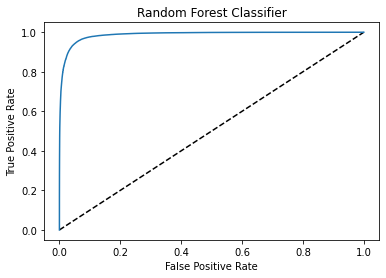

In [98]:
#plotting roc curves
plt.plot([0,1],[0,1],'k--')  #([x-axis],[y-axis],broken lines)
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

Area under the curve is fine for random forest classifier

In [99]:
#confusion matrix
print(confusion_matrix(y_test,predrf))

[[43082  2897]
 [ 1977 43760]]


precision=TP/TP+FP

Recall=TP/TP+FN

In [105]:
#precision for class 0
print("Precision of Random Forest=", 43082/(43082+1977))

#recall for class 0
print("Recall of Random Forest=", 43082/(43082+2897))

Precision of Random Forest= 0.9561241927250937
Recall of Random Forest= 0.936992975053829


In [106]:
#precision class 1
print("Precision of Random Forest=", 43760/(43760+2897))

#recall for class 1
print("Recall of Random Forest=", 43760/(43760+1977))

Precision of Random Forest= 0.9379085667745461
Recall of Random Forest= 0.9567746026193236


In [110]:
#selecting best cv score
accuracy_r=accuracy_score(y_test,predrf)
for a in range(2,10):
    cvl=cross_val_score(rf,x,y,cv=a)
    avg=cvl.mean()
    print("At cv:",a)
    print("CV Score=",avg*100)
    print("accuracy score=",accuracy_r*100)    

At cv: 2
CV Score= 93.43022716988949
accuracy score= 94.6857691133499
At cv: 3
CV Score= 93.81158455075463
accuracy score= 94.6857691133499
At cv: 4
CV Score= 93.93206617303758
accuracy score= 94.6857691133499
At cv: 5
CV Score= 94.01112326771722
accuracy score= 94.6857691133499
At cv: 6
CV Score= 94.03755616310026
accuracy score= 94.6857691133499
At cv: 7
CV Score= 94.0506321214644
accuracy score= 94.6857691133499
At cv: 8
CV Score= 94.29241960379645
accuracy score= 94.6857691133499
At cv: 9
CV Score= 94.43036701868341
accuracy score= 94.6857691133499


Here default cv score gives equal cv score and accuracy score So I choose cv score = 5 other cv score have not much different

# Hyper Parameter Tuning

In [112]:
#parameters of random forest classifier stored
parameters={'n_estimators':np.arange(40,60),'criterion':['gini','entropy'],'max_depth':np.arange(0,5)}
#gridsearchcv
grid=GridSearchCV(rf,parameters)

In [113]:
#fitting
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([0, 1, 2, 3, 4]),
                         'n_estimators': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59])})

In [115]:
#best parameters
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 47}

In [117]:
#final model
final=RandomForestClassifier(criterion='gini',max_depth=4,n_estimators=47)
final.fit(x_train,y_train)
predfinal=final.predict(x_test)
acc_f=(accuracy_score(y_test,predfinal))
print(acc_f*100)

80.6184308081469


In [118]:
print(classification_report(y_test,predfinal))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     45979
           1       0.81      0.80      0.81     45737

    accuracy                           0.81     91716
   macro avg       0.81      0.81      0.81     91716
weighted avg       0.81      0.81      0.81     91716



In [120]:
#model saving
import joblib as jb
jb.dump(final,"micro_credit.pkl")

['micro_credit.pkl']

# Conclusion

In [119]:
a=np.array(y_test)
predicted=np.array(final.predict(x_test))
credit=pd.DataFrame({"Original:":a,"Predicted":predicted},index=range(len(a)))
credit

,Original:,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
91711,0,0
91712,0,0
91713,0,0
91714,0,0
